In [1]:
%load_ext autoreload
%autoreload 2


In [1]:
from actincme.bin.symmetricize import Symmetricize
from actincme.bin.rotate import Rotate
import matplotlib.pyplot as plt



Bad key "text.kerning_factor" on line 4 in
/Users/makamats/opt/anaconda3/envs/actincme/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Manual slice selection (for overhangs)

In [2]:
# manually determined slices
start_list = [1, 4, 4, 4, 5, 6, 5, 6, 5, 6, 2, 4, 5, 3, 6, 7, 1, 4, 1, 2, 1, 5, 1, 1, 1, 0, 1]
end_list = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -3, -1, -1, -1, -1, -1, -1, -2, -1, -2, -1]



Symmetricize every z slice and rotate it (neglecting actual z position when rotating)

In [3]:

for i in range(27):
    if i not in [13, 17, 18, 20, 22, 24, 26]:
        shape = Symmetricize('../actincme/pkl_files/', i+1, start_list[i], end_list[i])
        this_x, this_y, this_z = shape.do_everything_2d("fit", plot=False) #handles all the logic in symmetricizing fit curves
        this_rotate = Rotate(this_x, this_y, this_z)
        this_rotate.rotate_single_curve(save = True)

Symmetricize every z slice and plot in 2D 

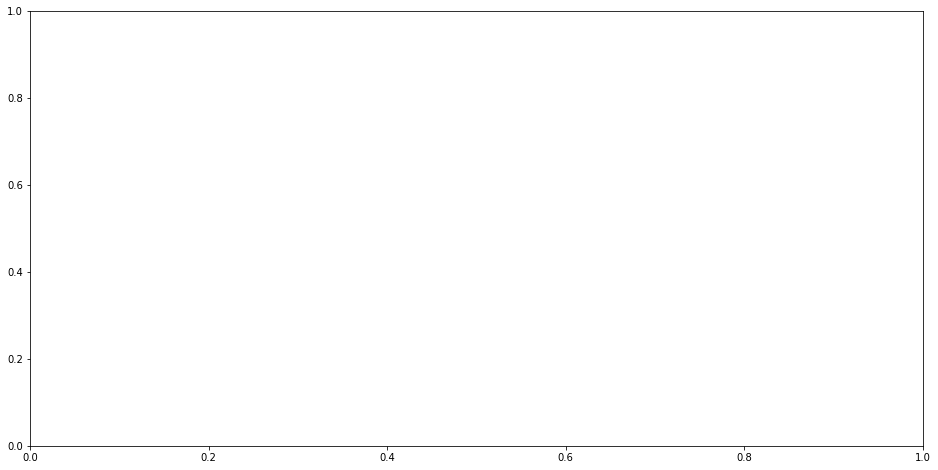

In [12]:
fig, ax = plt.subplots(figsize=[16,8])

for i in range(27):
    if i not in [13, 17, 18, 20, 22, 24, 26]:
        shape = Symmetricize('../actincme/pkl_files/', i+1, start_list[i], end_list[i])
        shape.do_everything_2d("fit") #handles all the logic in symmetricizing fit curves
        fname = '_tmp%05d.png' % int(i)
        plt.tight_layout()
        ax.set_ylim([-300, 300])
        ax.set_xlim([-200, 200])
        plt.savefig(fname)
        plt.clf()
        plt.cla()
        plt.close()
        fig, ax = plt.subplots(figsize=[16,8])

Symmetricize every z slice and plot in 3d

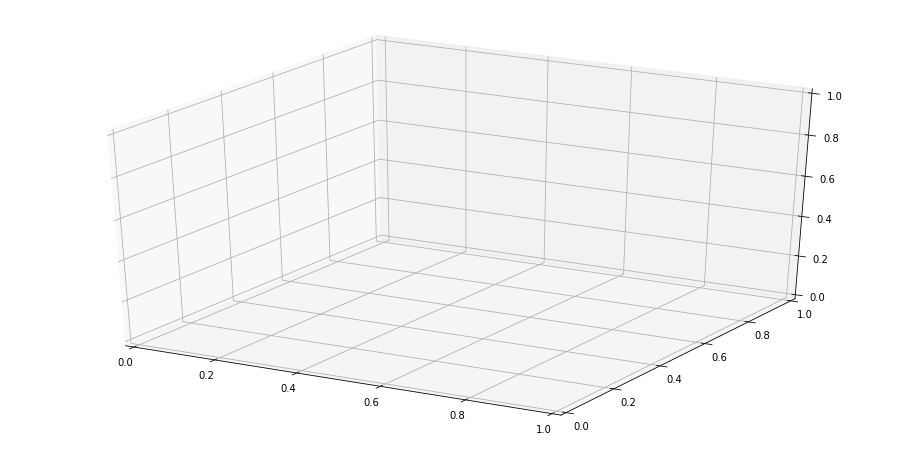

In [6]:
fig = plt.figure(figsize=[16,8])
ax=fig.add_subplot(111, projection='3d')

for i in range(27):
    if i not in [13, 17, 18, 20, 22, 24, 26]:
        shape = Symmetricize('../actincme/pkl_files/', i+1, start_list[i], end_list[i])

        shape.do_everything(ax, "fit") #handles all the logic in symmetricizing fit curves
        fname = '_tmp%05d.png' % int(i)
        plt.tight_layout()
        ax.set_zlim([90, 140])
        ax.set_ylim([-300, 300])
        ax.set_xlim([-200, 200])
        plt.savefig(fname)
        plt.clf()
        plt.cla()
        plt.close()
        fig = plt.figure(figsize=[16,8])
        ax=fig.add_subplot(111, projection='3d')


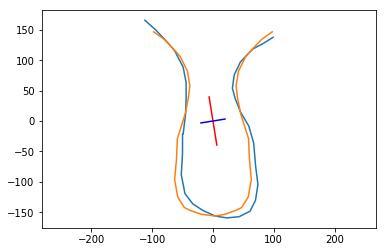

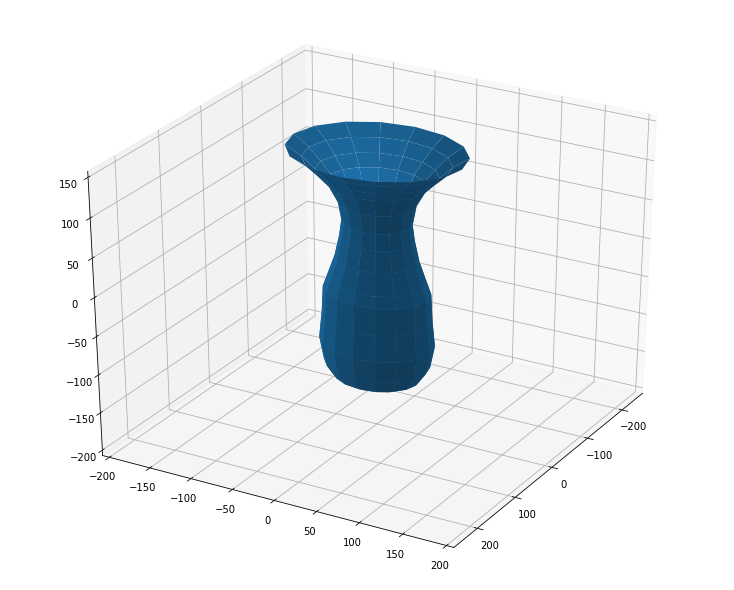

In [4]:
# save a particular slice symmetrecisized and made 3D

i=8

shape = Symmetricize('../actincme/pkl_files/', i+1, start_list[i], end_list[i])
this_x, this_y, this_z = shape.do_everything_2d("fit", plot=True) #handles all the logic in symmetricizing fit curves
this_rotate = Rotate(this_x, this_y, this_z)
this_rotate.rotate_single_curve(save = False)


In [5]:
# return XYZ mean coords
import numpy as np
x0, y0, z0 = shape.get_mean_coords()

this_rotate.remap_xyz(x0,y0,z0)

# this_rotate.x3d

In [6]:
# save the object
import pickle
pickle.dump(this_rotate, open('rotate_obj.pkl', 'wb'))



In [7]:
this_rotate